In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes multinomial para clasificación
from sklearn.naive_bayes import GaussianNB # naive bayes gausiano para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report


# Análisis Exploratorio

In [2]:
df_50 = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/adult_income.csv', header=None)
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'target']
df_50.columns = col_names
df_50.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# verificamos los tipos de datos
df_50.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [4]:
print("Tamaño del dataframe : {}".format(df_50.shape))

Tamaño del dataframe : (32561, 15)


In [16]:
# Verificamos si hay valores nulos para imputar
df_50.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


target
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

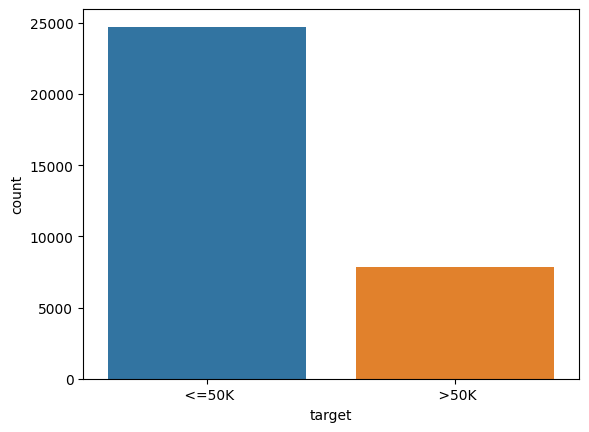

In [5]:
# Analisis de la distribución de la variable target
print( df_50.target.value_counts() )
sns.countplot(x='target', data=df_50, hue='target', legend=False)

In [6]:
# identificamos las variables categóricas
categorical = [var for var in df_50.columns if df_50[var].dtype=='O']
print('las variables categoricas son:\n', categorical)
print("\nchequeamos la dimensionalidad de las variables")
for var in categorical:
    print(len(df_50[var].unique()), ' valores unicos en ', var )

las variables categoricas son:
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'target']

chequeamos la dimensionalidad de las variables
9  valores unicos en  workclass
16  valores unicos en  education
7  valores unicos en  marital_status
15  valores unicos en  occupation
6  valores unicos en  relationship
5  valores unicos en  race
2  valores unicos en  sex
42  valores unicos en  native_country
2  valores unicos en  target


In [7]:
# paso target a una variable numerica
df_50['target'] = df_50['target'].apply(lambda x: 1 if x == ' >50K' else 0 )

In [17]:
# identificamos las variables numéricas
numerical = [var for var in df_50.columns if df_50[var].dtype!='O']
print('las variables numéricas son:\n', numerical)

las variables numéricas son:
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'target']


# Correlación de Variables

<Axes: >

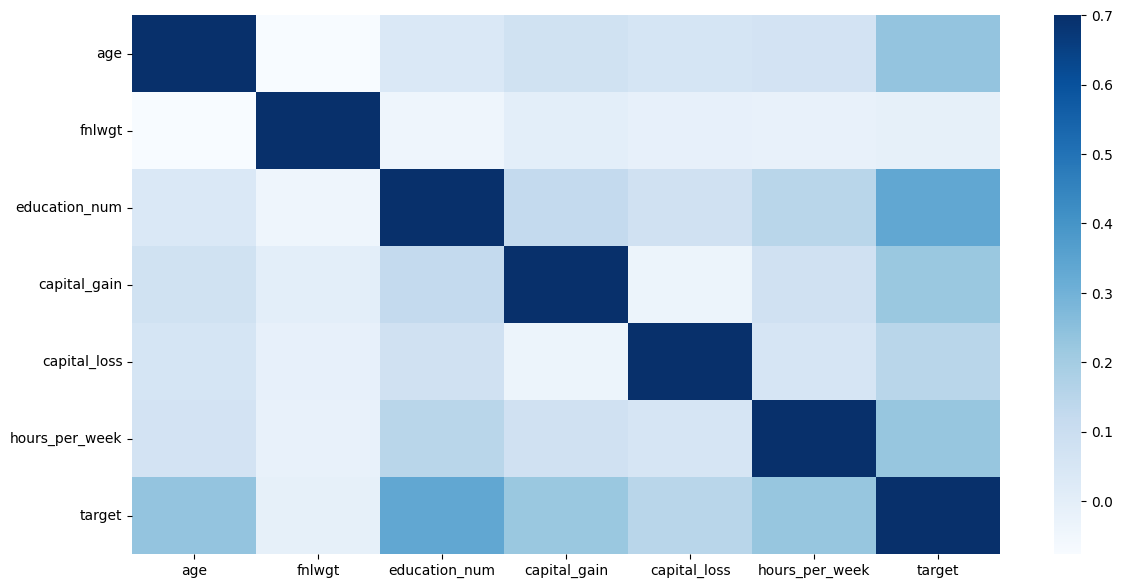

In [9]:
plt.figure(figsize=(14,7))
sns.heatmap(df_50[numerical].corr(), vmax=.7, cmap ='Blues', fmt=".2f")

In [10]:
df_corr = df_50[numerical].corr()[["target"]]*100 # lo pasamos a porcentajes
df_corr = df_corr.drop("target", axis=0) # eliminamos la variable target
df_corr = df_corr.sort_values(["target"], ascending=False) # ordenamos en forma descendente
df_corr = abs(df_corr) # nos interesa el valor absouluto
df_corr

,target
education_num,33.515395
age,23.403710
hours_per_week,22.968907
capital_gain,22.332882
capital_loss,15.052631
fnlwgt,0.946256


# Seleccionamos las variables que vamos a utilizar y hacemos el Split

In [11]:
df_50.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

In [12]:
# usamos todas las columnas numércias
df = df_50[numerical]
X = df.drop("target",axis=1)
y = df["target"]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [13]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [14]:
# Creamos y entrenamos el clasificador bayesiano
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train) # entrenamos el clasificador

MultinomialNB()

In [15]:
y_pred_nb = bayes_multi.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 77.93 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7417
           1       0.61      0.24      0.34      2352

    accuracy                           0.78      9769
   macro avg       0.70      0.59      0.60      9769
weighted avg       0.75      0.78      0.74      9769



# Ejercicio
- ¿hay variables redundantes en este dataframe? ¿que variables feature engineering incluirias en este modelo?
- Reemplazar MultinomialNB por GaussianNB y comparar el desempeño
- Usando OneHotEncoder o pd.get_dummies() en las variables categóricas de baja dimensionalidad, obtener columnas numericas para representarlas. incluirlas al modelo y comparar el resultado

¿hay variables redundantes en este dataframe? ¿que variables feature engineering incluirias en este modelo?

In [20]:
# Matriz de correlación (solo variables numéricas)
corr_matrix = df.corr(numeric_only=True).abs()

# Seleccionamos la parte superior de la matriz para evitar duplicados
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Definimos un umbral de redundancia (ej. 0.95)
threshold = 0.95

# Buscamos columnas que tienen alguna correlación mayor al umbral
redundant_cols = [column for column in upper.columns if any(upper[column] > threshold)]

print("Variables redundantes:", redundant_cols)


Variables redundantes: []


In [50]:
#education_num es una versión ordenada de la educación y puede ser más informativa que los dummies individuales.
df_50.groupby('education')['education_num'].mean().sort_values()

KeyError: 'education'

In [46]:
df_50 = df_50.drop(columns=['education'])

Usando OneHotEncoder o pd.get_dummies() en las variables categóricas de baja dimensionalidad, obtener columnas numericas para representarlas. incluirlas al modelo y comparar el resultado

In [48]:
categorical = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

#get_dummies para convertirlas en columnas binarias
df_dummies = pd.get_dummies(df_50[categorical], drop_first=True)

#Combinar las columnas numéricas originales + dummies
numerical = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'target']
df_encoded = pd.concat([df_50[numerical], df_dummies], axis=1)

In [49]:
#Ver solo las correlaciones fuertes (>0.8)
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strong_corrs = [(col, row, upper.loc[row, col]) for col in upper.columns for row in upper.index if abs(upper.loc[row, col]) > 0.5]

#Mostrar
print("Pares de variables con correlación > 0.8:")
for col1, col2, value in strong_corrs:
    print(f"{col1} vs {col2}: {value:.2f}")

Pares de variables con correlación > 0.8:
education_ Bachelors vs education_num: 0.50
marital_status_ Never-married vs age: -0.53
marital_status_ Never-married vs marital_status_ Married-civ-spouse: -0.64
relationship_ Not-in-family vs marital_status_ Married-civ-spouse: -0.54
relationship_ Own-child vs marital_status_ Never-married: 0.51
race_ White vs race_ Black: -0.79


¿hay variables redundantes en este dataframe? ¿que variables feature engineering incluirias en este modelo?

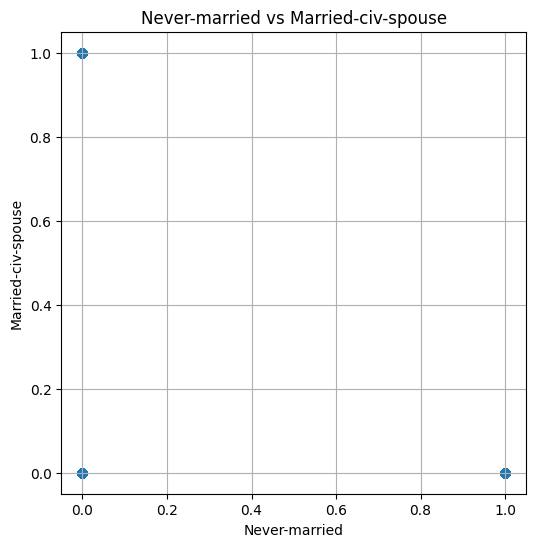

In [51]:
#marital_status_ Never-married vs marital_status_ Married-civ-spouse: -0.64 contienen información inversa.
plt.figure(figsize=(6, 6))
plt.scatter(
    df_encoded['marital_status_ Never-married'],
    df_encoded['marital_status_ Married-civ-spouse'],
    alpha=0.3
)
plt.title('Never-married vs Married-civ-spouse')
plt.xlabel('Never-married')
plt.ylabel('Married-civ-spouse')
plt.grid(True)
plt.show()

In [53]:
df_encoded = df_encoded.drop(columns=['marital_status_ Married-civ-spouse',])

In [58]:
#relationship_ Own-child y marital_status_ Never-married tienen alta correlación positiva, creamos una feature binaria que indique "joven independiente".
df_encoded['young_independent'] = (
    (df_encoded['relationship_ Own-child'] == 1) &
    (df_encoded['marital_status_ Never-married'] == 1)
).astype(int)
df_encoded = df_encoded.drop(columns=['relationship_ Own-child', 'marital_status_ Never-married'])

In [75]:
for col in df_encoded.columns:
    print(col)

age
fnlwgt
education_num
capital_gain
capital_loss
hours_per_week
target
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
marital_status_ Married-spouse-absent
marital_status_ Separated
marital_status_ Widowed
occupation_ Adm-clerical
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-service
occupation_ Priv-house-serv
occupation_ Prof-specialty
occupation_ Protective-serv
occupation_ Sales
occupation_ Tech-support
occupation_ Transport-moving
relationship_ Not-in-family
relationship_ Other-relative
relationship_ Unmarried
relationship_ Wife
race_ Asian-Pac-Islander
race_ Black
race_ Other
race_ White
sex_ Male
native_country_ Canada
native_country_ Cuba
native_country_ El-Salvador
native_country_ England
native_country_ Germany
native_country_ India
native_country_ Mexico
native_country_ Phil

In [66]:
#eliminar constantes
# Calcular la desviación estándar de cada columna
std_devs = df_encoded.std()

# Filtrar columnas con desviación estándar mayor a un umbral
threshold = 0.05  # Ajusta el umbral según sea necesario
columnas_bajas_var = std_devs[std_devs < threshold].index

# Eliminar columnas con baja variabilidad
df_encoded = df_encoded.drop(columns=columnas_bajas_var)
print(f"Columnas eliminadas: {columnas_bajas_var}")

Columnas eliminadas: Index(['workclass_ Never-worked', 'workclass_ Without-pay',
       'marital_status_ Married-AF-spouse', 'occupation_ Armed-Forces',
       'native_country_ Cambodia', 'native_country_ China',
       'native_country_ Columbia', 'native_country_ Dominican-Republic',
       'native_country_ Ecuador', 'native_country_ France',
       'native_country_ Greece', 'native_country_ Guatemala',
       'native_country_ Haiti', 'native_country_ Holand-Netherlands',
       'native_country_ Honduras', 'native_country_ Hong',
       'native_country_ Hungary', 'native_country_ Iran',
       'native_country_ Ireland', 'native_country_ Italy',
       'native_country_ Jamaica', 'native_country_ Japan',
       'native_country_ Laos', 'native_country_ Nicaragua',
       'native_country_ Outlying-US(Guam-USVI-etc)', 'native_country_ Peru',
       'native_country_ Poland', 'native_country_ Portugal',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwa

Si eliminamos las colunmas con baja correlación con target suben los valores de los scores

In [83]:
# Establecer un umbral de correlación baja para eliminar columnas (por ejemplo, menor a 0.1 en valor absoluto)
umbral_correlacion_baja = 0.1
columnas_a_eliminar_baja = correlacion_target[correlacion_target.abs() < umbral_correlacion_baja].index

# Eliminar esas columnas del DataFrame
df_encoded_sin_columnas_baja = df_encoded.drop(columns=columnas_a_eliminar_baja)

# Mostrar las columnas eliminadas
print("Columnas con baja correlación con 'target' (menor a 0.1 en valor absoluto):")
print(columnas_a_eliminar_baja)

# Mostrar el nuevo DataFrame sin las columnas de baja correlación
print("Nuevo DataFrame sin las columnas de baja correlación:")
print(df_encoded_sin_columnas_baja.head())

Columnas con baja correlación con 'target' (menor a 0.1 en valor absoluto):
Index(['fnlwgt', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'marital_status_ Married-spouse-absent',
       'marital_status_ Separated', 'marital_status_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Craft-repair',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Priv-house-serv',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'relationship_ Other-relative', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other', 'race_ White', 'native_country_ Canada',
       'native_country_ Cuba', 'native_country_ El-Salvador',
       'native_country_ England', 'native_country_ Germany',
       'native_country_ India', 'native_country_ Mexico',
     

In [95]:
X = df_encoded_sin_columnas_baja.drop(columns=['target'])  # Features (sin la variable target)
y = df_encoded_sin_columnas_baja['target']  # Etiquetas (target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Creamos el clasificador Bayesiano Multinomial
bayes_multi = MultinomialNB()

# Entrenamos el clasificador
bayes_multi.fit(X_train, y_train)


MultinomialNB()

In [96]:
y_pred_nb = bayes_multi.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 77.47 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      7417
           1       0.59      0.21      0.31      2352

    accuracy                           0.77      9769
   macro avg       0.69      0.58      0.59      9769
weighted avg       0.74      0.77      0.73      9769



In [98]:
#Reemplazar MultinomialNB por GaussianNB y comparar el desempeño
# Definir las características y la etiqueta
X = df_encoded_sin_columnas_baja.drop(columns=['target'])  # Características (sin la variable target)
y = df_encoded_sin_columnas_baja['target']  # Etiquetas (target)

# Hacer el split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Creamos el clasificador Bayesiano Gaussiano
bayes_gaussian = GaussianNB()

# Entrenamos el clasificador
bayes_gaussian.fit(X_train, y_train)

y_pred_nb = bayes_gaussian.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 82.09 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7417
           1       0.69      0.46      0.55      2352

    accuracy                           0.82      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

